In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Categorical Information Dataframe

Contains information about whether a country has implemented a legal reform, the date on which they did it, and a unique colour for each country:

In [2]:
country_info = pd.DataFrame({'country': ['A', 'B', 'C', 'D'],
                                      'reformed': ['N','N', 'Y', 'Y'],
                             'timepoint_of_reform': ['NA', 'NA', 10, 15],
                                        'color': ['red', 'green', 'blue', 'orange']})

# putting the country names in the index, so they can be gotten with .loc
country_info.set_index('country', drop = True, inplace = True)  

# renaming the index, not essential, just making it clearer for this example
country_info.index.rename('Country', inplace = True)

country_info

,reformed,timepoint_of_reform,color
Country,,,
A,N,NA,red
B,N,NA,green
C,Y,10,blue
D,Y,15,orange


# Longitudinal Information Dataframe

Contains the number of events in each timepoint, for each country (the events could be anything: number of births, number of deaths, number of spontaneous combustions per 1000 people etc. etc.). Each column is a different country.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# creating some fake time series data

data_1 = np.abs(np.arange(30) + np.random.normal(0, 5, size = 30)).astype('int')

data_2 = np.abs(np.arange(30) + np.random.normal(-10, 5, size = 30)).astype('int')

data_3 = np.abs(np.arange(30) + np.random.normal(-20, 5, size = 30)).astype('int')

data_4 = np.abs(np.arange(30) + np.random.normal(-30, 5, size = 30)).astype('int')


longitudinal_df = pd.DataFrame({'A': data_1,
                 'B': data_2,
                  'C': data_3,
                  'D': data_4})

# setting the index as the timepoints
longitudinal_df.index.rename('Time point:', inplace = True)

longitudinal_df.head(10)

,A,B,C,D
Time point:,,,,
0,6,19,16,27
1,2,8,22,39
2,2,14,28,27
3,2,17,25,22
4,5,2,19,24
5,3,2,14,31
6,14,5,1,17
7,12,12,20,24
8,6,3,16,23


# Using the categorical country information to group the timeseries data

In [4]:
# a dataframe of just the reformed countries
country_info[country_info['reformed'] == 'Y']

,reformed,timepoint_of_reform,color
Country,,,
C,Y,10,blue
D,Y,15,orange


In [5]:
# saving the array of reformed country names as a variable
reform_countries = country_info[country_info['reformed'] == 'Y'].index.values  # using `.values` strips unnecessary extra information
                                                                                # and returns an array of just the values (without the index etc.)

reform_countries

array(['C', 'D'], dtype=object)

In [6]:
# an array containing just the names of NON-reformed countries
nonreform_countries = country_info[country_info['reformed'] == 'N'].index.values

nonreform_countries

array(['A', 'B'], dtype=object)

#### Using the categorical dataframe to get the unique colours for each country when plotting all the countries' timeseries

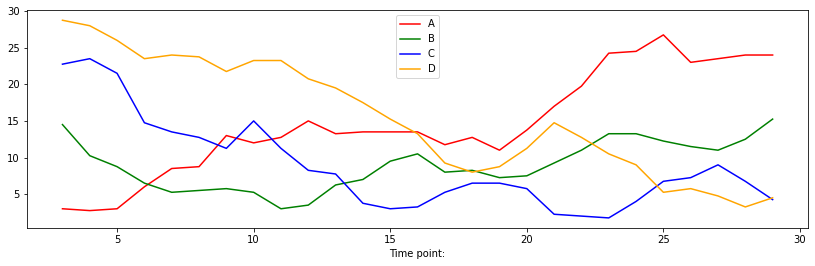

In [7]:
                                                # getting the unique country colours from the categorical dataframe
longitudinal_df.rolling(window = 4).mean().plot(color = country_info['color'], figsize = (14, 4));

### Separate plots for countries grouped by a category

In [8]:
# creating a dataframe of the timeseries info just for the reform countries
reform_time = longitudinal_df[reform_countries].copy()

reform_time.head()

,C,D
Time point:,,
0,16,27
1,22,39
2,28,27
3,25,22
4,19,24


In [9]:
# creating a dataframe of the timeseries info just for the NON-reformed countries
nonreform_time = longitudinal_df[nonreform_countries].copy()

nonreform_time.head()

,A,B
Time point:,,
0,6,19
1,2,8
2,2,14
3,2,17
4,5,2


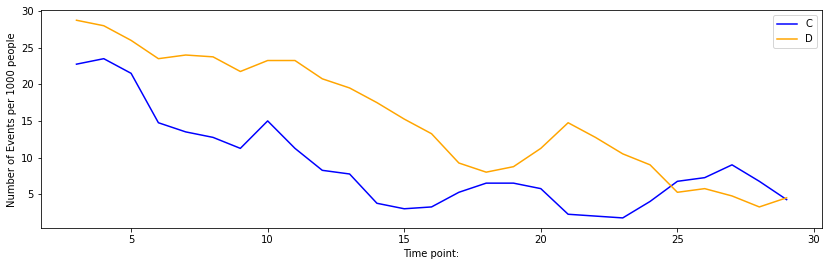

In [10]:
# plotting just the reform countries, with the correct colors

reform_time.rolling(window = 4).mean().plot(color = country_info.loc[reform_countries]['color'], figsize = (14, 4))
plt.ylabel('Number of Events per 1000 people');


# the "color =" argument above is why its useful to have country names in the index, e.g. so 
# .loc can be used to get the countries from the categorical dataframe

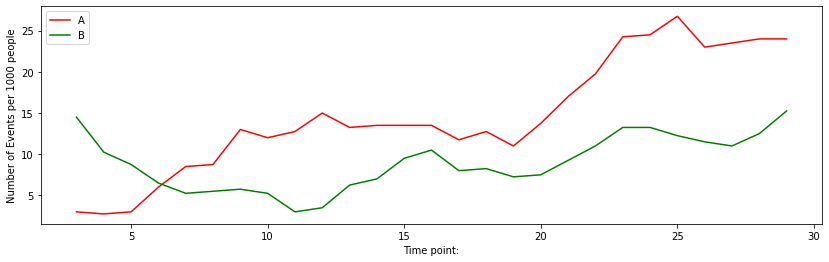

In [11]:
# plotting just the nonreform countries, with the correct colors
nonreform_time.rolling(window = 4).mean().plot(color = country_info.loc[nonreform_countries]['color'], figsize = (14, 4))
plt.ylabel('Number of Events per 1000 people');

# plotting the countries, category vs category, colouring by category

This might be useful for looking for general trends, when the countries are grouped by category membership


*note*: there is a way to do this with pandas plotting functions but it would require modifying the dataframes (extra columns etc.), so I'm doing just with matplotlib

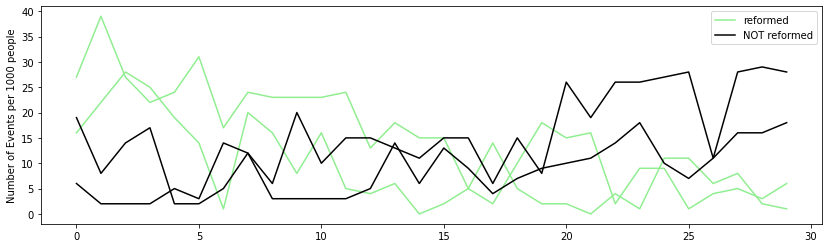

In [12]:
# setting the fig size, the matplotlib way
plt.figure(figsize = (14, 4))

# plotting the reform countries together
# 'reform_time.index' contains the timepoints, 'reform_time' is the data for each country
plt.plot(reform_time.index, reform_time, color = 'lightgreen')

# plotting the NON-reformed countries on the same plot
# 'nonreform_time.index' contains the timepoints, 'nonreform_time' is the data for each country
plt.plot(nonreform_time.index, nonreform_time, color = 'black')

# using 'empty' plots to tell the legend what text/colours to show
# essentially this just attachs a label to lines of a certain color
plt.plot([], [], color = 'lightgreen', label = 'reformed')
plt.plot([], [], color = 'black', label = 'NOT reformed')

# label the y axis
plt.ylabel('Number of Events per 1000 people')

# show the plot
plt.legend();

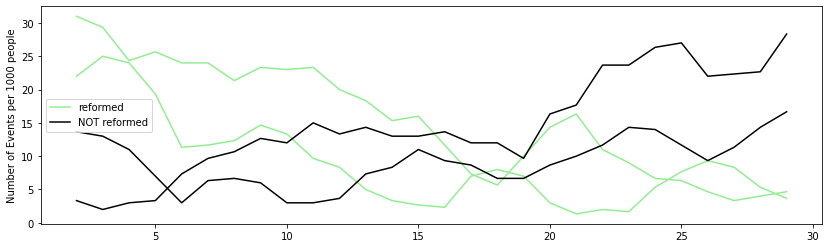

In [13]:
# same plot as above, but smoothed using a rolling average

# setting the fig size, the matplotlib way
plt.figure(figsize = (14, 4))

# plotting the reformed countries together
plt.plot(reform_time.index, reform_time.rolling(window = 3).mean(), color = 'lightgreen')

# plotting the nonreformed countries on the same plot
plt.plot(nonreform_time.index, nonreform_time.rolling(window = 3).mean(), color = 'black')

# using 'empty' plots to tell the legend what text/colours to show
# essentially this just attachs a label to lines of a certain color
plt.plot([], [], color = 'lightgreen', label = 'reformed')
plt.plot([], [], color = 'black', label = 'NOT reformed')

# label the y axis
plt.ylabel('Number of Events per 1000 people')

# show the plot
plt.legend();

# plotting the countries category vs category, colouring with unique country colours, showing category membership with line style

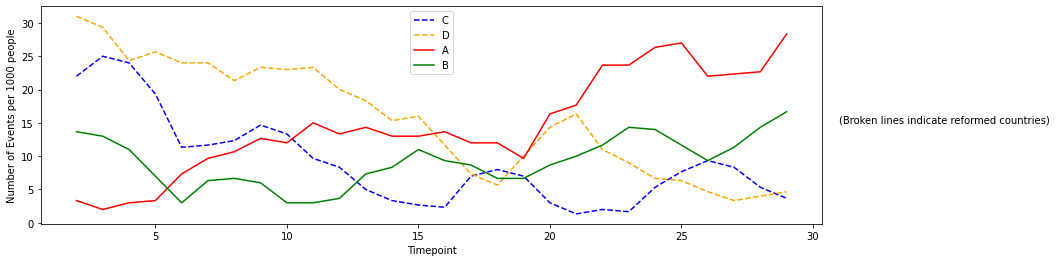

In [14]:
# setting the fig size, the matplotlib way
plt.figure(figsize = (14, 4))


# plotting the reformed countries together, using a for loop to get the unique colours

#for each of the reformed countries
for country in reform_time.columns:
    
    # plot the timeseries for that country
    plt.plot(reform_time.index, reform_time[country].rolling(window = 3).mean(),
            color = country_info.loc[country]['color'], label = country, # get the correct colour and country name
            linestyle = '--') # use a broken linestyle
    
# plotting the NON-reformed countries together, using a for loop to get the unique colours
for country in nonreform_time.columns:
    plt.plot(nonreform_time.index, nonreform_time[country].rolling(window = 3).mean(),
            color = country_info.loc[country]['color'], label = country)
    
# labelling the axes
plt.xlabel('Timepoint')
plt.ylabel('Number of Events per 1000 people')

# adding some text to indicate which countries are in each category (many ways this could be done, e.g. in the title etc.)
plt.text(35, 15,  '(Broken lines indicate reformed countries)', ha='center')

# show the legend
plt.legend();



# plotting the countries category vs category, colouring with unique country colours, showing category membership with line style. Showing the date of reform with a vertical line

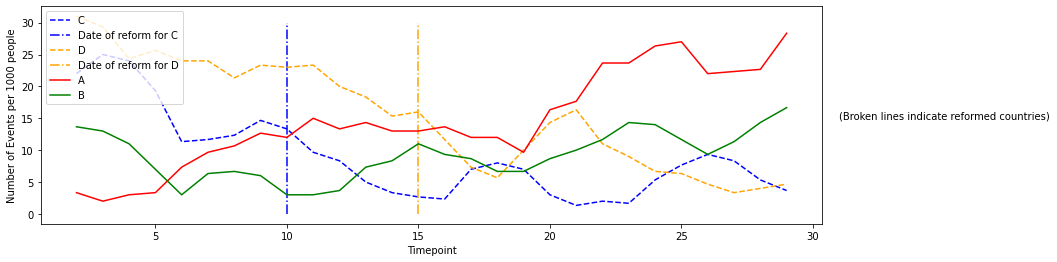

In [15]:
# setting the fig size, the matplotlib way
plt.figure(figsize = (14, 4))

# plotting the reformed countries together, using a for loop to get the unique colours

for country in reform_time.columns:
    plt.plot(reform_time.index, reform_time[country].rolling(window = 3).mean(),
            color = country_info.loc[country]['color'], label = country,
            linestyle = '--')
    
    # adding a marker of the date of reform
    # getting the date of reform, from the categorical dataframe
    date_of_reform_current_country = country_info.loc[country]['timepoint_of_reform'] 
    
    # plotting a vertical line where the x coordinates for the start and finish of the line
    # are the date of reform for the current country
    plt.plot([date_of_reform_current_country, date_of_reform_current_country], [0, 30],
             color = country_info.loc[country]['color'],  # getting the unique country colour
             linestyle = 'dashdot', # setting a linestyle
             label = 'Date of reform for '+str(country)) # adding the correct country name to the legend
    
    
# plotting the NON-reformed countries together, using a for loop to get the unique colours
for country in nonreform_time.columns:
    plt.plot(nonreform_time.index, nonreform_time[country].rolling(window = 3).mean(),
            color = country_info.loc[country]['color'], label = country)
    
    
# labelling the axes
plt.xlabel('Timepoint')
plt.ylabel('Number of Events per 1000 people')

# adding some text to indicate which countries are in each category (many ways this could be done, e.g. in the title etc.)
plt.text(35, 15,  '(Broken lines indicate reformed countries)', ha='center')

# show the legend
plt.legend(loc = 'upper left');

# Using the categorical country information dataframe to get BEFORE/AFTER data, and change scores

A simple way of doing this (by 'brute force') would be to choose a BEFORE timepoint and an AFTER timepoint for each country, from which to compute the (AFTER - BEFORE) change scores.

Another way of doing this, for the countries which did reform, might be to calculate the change score from before/after scores a certain number of years either side of the timepoint of the reform for that country.  

E.g. if the timepoint of reform for country D is timepoint 10, we could take the before and after scores from +/- 5 timepoints either side of this. E.g. to get country D's before/after scores, we'd use country D's score at timepoint 5 as for the 'BEFORE' score, and country D's score at timepoint 15 for the 'AFTER' score. We'd get the change score by subtracting the BEFORE score from the AFTER score.

For the nonreformed countries, we could take the dates of reform from the countries which did reform, and randomly assign them to the countries that didn't reform, and get before/after scores from a certain number of years either side of the randomly assigned reform date. E.g. if country A (which didn't reform) got randomly assigned the timepoint of reform from country D (timepoint 15), we could take country A's score at timepoint 10 as the 'BEFORE' score, and its score at timepoint 20 as it's 'AFTER' score. 

E.g.:

In [16]:
# countries A and B do not have timepoints at which they reformed
country_info

,reformed,timepoint_of_reform,color
Country,,,
A,N,NA,red
B,N,NA,green
C,Y,10,blue
D,Y,15,orange


In [17]:
# getting the actual dates of reform, for the countries which did reform
actual_reform_dates = country_info[country_info['timepoint_of_reform'] != 'NA']['timepoint_of_reform'].values

actual_reform_dates

array([10, 15], dtype=object)

In [18]:
# randomly assigning timepoints of reform to countries that didn't reform

country_info_fake_dates = country_info.copy()

country_info_fake_dates['timepoint_of_reform'].replace('NA', np.random.choice(actual_reform_dates), inplace = True)

country_info_fake_dates

,reformed,timepoint_of_reform,color
Country,,,
A,N,15,red
B,N,15,green
C,Y,10,blue
D,Y,15,orange


Now all of the countries, whether they reformed or not,  have cutoff points for the before/after comparison. 

For the countries which didn't reform, randomly assigning the cutoffs from the empirical reform timepoints may help to prevent bias in selecting the timepoint for before/after comparison for nonreformed countries.

We can use these the timepoint_of_reform to get the before/after scores from the time series. I'll show how to do this +/- 5 timepoint either side of the timepoint_of_reform:

In [19]:
nonreform_time.head(20)

,A,B
Time point:,,
0,6,19
1,2,8
2,2,14
3,2,17
4,5,2
5,3,2
6,14,5
7,12,12
8,6,3


In [20]:
# the fake reform timepoint for country A 
reform_timepoint_A = country_info_fake_dates.loc['A']['timepoint_of_reform']

reform_timepoint_A

15

In [21]:
# the BEFORE score, -5 timepoints before the timepoint_of_reform for country A (check this against the timeseries df above)
nonreform_time['A'].loc[reform_timepoint_A - 5]

10

In [22]:
# the AFTER score, +5 timepoints before the timepoint_of_reform for country A (check this against the timeseries df above)
nonreform_time['A'].loc[reform_timepoint_A + 5]

26

We can use a for loop to get an array of the BEFORE scores for each country, and an array of the AFTER scores for each country.

Here's a loop that does this for the reformed countries:

In [23]:
before_reformed = np.array([])
after_reformed = np.array([])

# for each of the reformed countries
for country in reform_time.columns:
    
    # get the timepoint_of_reform for the current country
    reform_timepoint_current_country = country_info_fake_dates.loc[country]['timepoint_of_reform']
    
    # from the timeseries data of the reformed countries 
    # get the before score, for the current country, -5 timepoints BEFORE its timepoint_of_reform
    current_before = reform_time[country].loc[reform_timepoint_current_country - 5]
    
    # from the timeseries data of the reformed countries
    # get the before score, for the current country, +5 timepoints AFTER its timepoint_of_reform
    current_after = reform_time[country].loc[reform_timepoint_current_country + 5]
    
    # append the before and after scores to the relevant arrays
    before_reformed = np.append(before_reformed, current_before)
    
    after_reformed = np.append(after_reformed, current_after)

In [24]:
# events 5 years BEFORE the reform, for the reformed countries
before_reformed

array([14., 23.])

In [25]:
# events 5 years AFTER the reform, for the reformed countries
after_reformed

array([ 2., 15.])

In [26]:
# calculating the change scores for the reformed countries

change_reformed = after_reformed - before_reformed

change_reformed

array([-12.,  -8.])

This process could be repeated with the nonreformed countries (which now have randomly assigned timepoints for the before/after comparison).

A permutation test could be performed on the change scores of the reformed and nonreformed countries.